# This notebook is used to verify the hexapod LUT
## This is for data taken on 2021-09-09 which goes up/down taking data in imaging mode only.
## This is seq_num 510-533
## Notebook finds stars and determines a PSF

In [1]:
import asyncio 
import matplotlib

import numpy as np
import pandas as pd

from matplotlib import pylab as plt
from astropy.time import Time, TimeDelta

from lsst_efd_client import EfdClient, resample, rendezvous_dataframes

%matplotlib inline

In [2]:
efd_client = EfdClient('summit_efd')
#efd_client = EfdClient('ldf_stable_efd') 

### Find data
Query for all the `endReadout` events on the timespan of the night.

In [3]:
date='20210909'
test='IQ_vs_elevation'

In [4]:
run='initial'

if run == 'initial':
    t1_set = Time("2021-09-10T05:14:44", format='isot', scale='tai')
    t2_set = Time("2021-09-10T05:35:50", format='isot', scale='tai')
#     start_log_msg = '[2021-07-08_Repeat_Focus_Test_START]'
#     finish_log_msg = '[2021-07-08_Repeat_Focus_Test_END]'
elif run == 'iter2': 
    t1_set = Time("2021-08-18T10:12:00", format='isot', scale='tai')
    t2_set = Time("2021-08-18T10:35:44", format='isot', scale='tai')
else:
    raise IOError('input not valid')

In [5]:
time = Time(Time.now(), format='isot', scale='tai')
print(f'time is {time}')

time is 2021-09-13T19:42:57.581


In [6]:
end_readout = await efd_client.select_time_series("lsst.sal.ATCamera.logevent_endReadout", 
                                           ["imageName", "requestedExposureTime", "additionalKeys",
                                            "additionalValues","timestampAcquisitionStart","timestampEndOfReadout"], t1_set, t2_set)

In [7]:
end_readout

,imageName,requestedExposureTime,additionalKeys,additionalValues,timestampAcquisitionStart,timestampEndOfReadout
2021-09-10 05:16:38.682000+00:00,AT_O_20210909_000510,30,groupId:imageType,2021-09-10T05\:16\:03.958:OBJECT,1.631251e+09,1.631251e+09
2021-09-10 05:17:11.281000+00:00,AT_O_20210909_000511,30,groupId:imageType,2021-09-10T05\:16\:03.958:OBJECT,1.631251e+09,1.631251e+09
2021-09-10 05:17:59.682000+00:00,AT_O_20210909_000512,30,groupId:imageType,2021-09-10T05\:17\:26.656:OBJECT,1.631251e+09,1.631251e+09
2021-09-10 05:18:32.257000+00:00,AT_O_20210909_000513,30,groupId:imageType,2021-09-10T05\:17\:26.656:OBJECT,1.631251e+09,1.631251e+09
2021-09-10 05:19:20.554000+00:00,AT_O_20210909_000514,30,groupId:imageType,2021-09-10T05\:18\:47.514:OBJECT,1.631251e+09,1.631251e+09
2021-09-10 05:19:53.135000+00:00,AT_O_20210909_000515,30,groupId:imageType,2021-09-10T05\:18\:47.514:OBJECT,1.631251e+09,1.631251e+09
2021-09-10 05:20:41.090000+00:00,AT_O_20210909_000516,30,groupId:imageType,2021-09-10T05\:20\:08.156:OBJECT,1.631251e+09,1.631251e+09
2021-09-10 05:21:13.662000+00:00,AT_O_20210909_000517,30,groupId:imageType,2021-09-10T05\:20\:08.156:OBJECT,1.631251e+09,1.631251e+09
2021-09-10 05:22:01.785000+00:00,AT_O_20210909_000518,30,groupId:imageType,2021-09-10T05\:21\:28.756:OBJECT,1.631251e+09,1.631251e+09
2021-09-10 05:22:34.356000+00:00,AT_O_20210909_000519,30,groupId:imageType,2021-09-10T05\:21\:28.756:OBJECT,1.631251e+09,1.631251e+09


In [8]:
# base0 = await efd_client.select_time_series("lsst.sal.Script.logevent_logMessage", 
#                                            ["message","level"], t1_set, t2_set)

In [9]:
# print(base0.to_string())

In [10]:
# Find the start/end sequences and trim the bad ones
# base = base0[(base0.message.str.find(start_log_msg) != -1) | (base0.message.str.find(finish_log_msg) != -1)]

In [11]:
# # Drop false starts
# if run == 'initial':
#     time_reg = '2021-07-09 02:41:02.488000+00:00'
#     ind=base.index.get_loc(time_reg, method='nearest')
#     base.drop(base.index[ind])

Now match each entry. For each `i` item with `intra` in the name, there must be an `i+1` with `extra` otherwise it is not a pair. 
A pair also has the same groupID
The image before the pair is an in-focus image.

In [12]:
intra_images = []
extra_images = []
in_focus_images = []
intra_times = []
extra_times = []
in_focus_times = []
intra_exptimes = []
extra_exptimes = []
in_focus_exptimes = []

df=pd.DataFrame()

i = 0
npairs = 0
nmiss = 0

while i < len(end_readout)-3:
    in_focus_20s = end_readout['imageName'][i]
    in_focus_exp_time = end_readout['requestedExposureTime'][i]
    #skip known bad files
    # 198 and 199 find different sources...
    bad_list=[]
    if in_focus_20s in bad_list or in_focus_exp_time != 30:
        i+=1
        continue

    df_tmp=pd.DataFrame({
                         'inFocus20s':end_readout['imageName'][i],
                         # Need times during cwfs for telescope position
                         'inFocusExpTime20s':end_readout['requestedExposureTime'][i],
                         'inFocustimestampEndOfReadout':end_readout['timestampEndOfReadout'][i],
                         'intraExtratimestampAcquisitionStart':end_readout['timestampAcquisitionStart'][i],
                         'intraExtratimestampEndOfReadout':end_readout['timestampEndOfReadout'][i],
                        }, index=[end_readout.index[i]])
    df=df.append(df_tmp)
    i+=1

In [13]:
df

,inFocus20s,inFocusExpTime20s,inFocustimestampEndOfReadout,intraExtratimestampAcquisitionStart,intraExtratimestampEndOfReadout
2021-09-10 05:16:38.682000+00:00,AT_O_20210909_000510,30,1.631251e+09,1.631251e+09,1.631251e+09
2021-09-10 05:17:11.281000+00:00,AT_O_20210909_000511,30,1.631251e+09,1.631251e+09,1.631251e+09
2021-09-10 05:17:59.682000+00:00,AT_O_20210909_000512,30,1.631251e+09,1.631251e+09,1.631251e+09
2021-09-10 05:18:32.257000+00:00,AT_O_20210909_000513,30,1.631251e+09,1.631251e+09,1.631251e+09
2021-09-10 05:19:20.554000+00:00,AT_O_20210909_000514,30,1.631251e+09,1.631251e+09,1.631251e+09
2021-09-10 05:19:53.135000+00:00,AT_O_20210909_000515,30,1.631251e+09,1.631251e+09,1.631251e+09
2021-09-10 05:20:41.090000+00:00,AT_O_20210909_000516,30,1.631251e+09,1.631251e+09,1.631251e+09
2021-09-10 05:21:13.662000+00:00,AT_O_20210909_000517,30,1.631251e+09,1.631251e+09,1.631251e+09
2021-09-10 05:22:01.785000+00:00,AT_O_20210909_000518,30,1.631251e+09,1.631251e+09,1.631251e+09
2021-09-10 05:22:34.356000+00:00,AT_O_20210909_000519,30,1.631251e+09,1.631251e+09,1.631251e+09


In [14]:
# create new dataframe with new values of interest and we'll join them post-facto
df_offsets=pd.DataFrame()
# Populate the data structure from the pairs found above
for i in range(len(df.index)):
    
    # Determine time stamps for searching for metadata
    # include ability to correct for TAI if required, but set to zero for the moment

#    t1 = Time(in_focus_times[i], scale='tai') - TimeDelta(in_focus_exptimes[i], format='sec', scale='tai')
#    t2 = Time(extra_times[i], scale='tai') - TimeDelta(2., format='sec', scale='tai')
    
    # want time during CWFS sensing for telescope position
    t1 = Time(df['intraExtratimestampAcquisitionStart'][i], format='unix_tai') 
    t2 = Time(df['intraExtratimestampEndOfReadout'][i],format='unix_tai')
    
    azel = await efd_client.select_time_series("lsst.sal.ATMCS.mount_AzEl_Encoders", 
                                               ["elevationCalculatedAngle99", "azimuthCalculatedAngle99"], t1, t2)
    # mount reporting incorrect timestamp for time_series (high frequency data)
    azel.index=azel.index+pd.tseries.offsets.DateOffset(seconds=-37)
    
    rotator = await efd_client.select_time_series("lsst.sal.ATMCS.mount_Nasmyth_Encoders",
                                                  ["nasmyth2CalculatedAngle99"], t1, t2)
    # mount reporting incorrect timestamp for time_series (high frequency data)
    rotator.index=rotator.index+pd.tseries.offsets.DateOffset(seconds=-37)

    m1_pressure = await efd_client.select_time_series("lsst.sal.ATPneumatics.m1AirPressure",
                                                  ["pressure"], t1, t2)
    
    # dimm only publishes every minute or so
    dimm = await efd_client.select_time_series("lsst.sal.DIMM.logevent_dimmMeasurement",
                                                  ["fwhm"], t1- TimeDelta(60., format='sec', scale='tai'), t2+ TimeDelta(60., format='sec', scale='tai'))
    
    # airmass should come from pointing, but it's the target airmass which doesn't seem to follow
    # what the mount position is... 
#     pointing = await efd_client.select_time_series("lsst.sal.ATPtg.currentTargetStatus",
#                                                   ["airmass"], t1, t2)
    
    # want time during long exposure for hexapod position (or basically just not the CWFS data)
    t2_hex = Time(df['inFocustimestampEndOfReadout'][i], format='unix_tai')
    t1_hex = t1-TimeDelta(df['inFocusExpTime20s'][i], format='sec', scale='tai') # this is subtraction, so before endOfReadout event above
    hexapod_vals = await efd_client.select_time_series("lsst.sal.ATHexapod.positionStatus", 
                                       ["reportedPosition0", "reportedPosition1", "reportedPosition2",
                                       "reportedPosition3", "reportedPosition4", "reportedPosition5"], t1_hex , t2_hex)

# For offsets we want to find the offsets between the start of the set and the beginning of the in-focus image, but the end works too
#     cmd_offset = await efd_client.select_time_series("lsst.sal.ATAOS.command_offset",
#                                                  ["u", "v", "w", "x", "y", "z"], offset_start , Time(df['inFocustimestampEndOfReadout'][i], format='unix_tai'))
    
    # to use the dataframe.between_time(), convert astropy Time object, to numpy time object, to pandas time object, and get the datetime.time
#     time1=pd.to_datetime(t1_set.to_datetime()).time()
#     time2=pd.to_datetime((Time(df['inFocustimestampEndOfReadout'][i],format='unix_tai')).to_datetime()).time()

    df_tmp=pd.DataFrame({'rot_pos':np.mean(rotator['nasmyth2CalculatedAngle99']),
                     'el':np.mean(azel['elevationCalculatedAngle99']),
                     'az':np.mean(azel['azimuthCalculatedAngle99']),
                     'x':hexapod_vals['reportedPosition0'].median(),
                     'y':hexapod_vals['reportedPosition1'].median(),
                     'z':hexapod_vals['reportedPosition2'].median(),
                     'u':hexapod_vals['reportedPosition3'].median(),
                     'v':hexapod_vals['reportedPosition4'].median(),
                     'w':hexapod_vals['reportedPosition5'].median(),
                     'm1': np.mean(m1_pressure['pressure']),
                     'airmass': 1.0/np.cos((90-np.mean(azel['elevationCalculatedAngle99']))*np.pi/180), #np.median(pointing['airmass']),
                     'seeing': np.mean(dimm['fwhm']),
#                      'hexXoffset': cmd_offset['x'].sum(),
#                      'hexYoffset': cmd_offset['y'].sum(),
#                      'hexUoffset': cmd_offset['u'].sum(),
#                      'hexVoffset': cmd_offset['v'].sum(),
#                      'hexZoffset': cmd_offset['z'].sum(),
                        },
                     index=[df.index[i]])
    df_offsets=df_offsets.append(df_tmp)

In [15]:
df_offsets

,rot_pos,el,az,x,y,z,u,v,w,m1,airmass,seeing
2021-09-10 05:16:38.682000+00:00,-1.576546,81.059962,179.503256,-3.810859,2.308517,-1.220271,0.350000,0.220000,3.224584e-08,120311.252735,1.012298,0.685083
2021-09-10 05:17:11.281000+00:00,-2.310709,81.047693,180.157069,-3.810628,2.308523,-1.236795,0.350002,0.220002,7.151944e-08,120309.144636,1.012332,0.704030
2021-09-10 05:17:59.682000+00:00,-0.425859,75.057895,178.384131,-3.857463,2.308526,-1.232106,0.350002,0.219999,-2.140092e-07,116631.815288,1.034996,0.710343
2021-09-10 05:18:32.257000+00:00,-0.868424,75.051734,178.744398,-3.857463,2.308526,-1.232106,0.350002,0.219999,-2.140092e-07,116529.454935,1.035026,0.711936
2021-09-10 05:19:20.554000+00:00,-0.308516,70.057827,178.245752,-3.909695,2.308518,-1.226419,0.349998,0.220000,-4.583625e-07,111889.310224,1.063788,0.745606
2021-09-10 05:19:53.135000+00:00,-0.642156,70.052348,178.493150,-3.909695,2.308518,-1.226419,0.349998,0.220000,-4.583625e-07,111888.927658,1.063824,0.726344
2021-09-10 05:20:41.090000+00:00,-0.244758,66.057819,178.171338,-3.956787,2.308525,-1.220752,0.350001,0.220001,-5.866593e-07,108345.855114,1.094145,0.724841
2021-09-10 05:21:13.662000+00:00,-0.516749,66.021832,178.352255,-3.956787,2.308525,-1.220752,0.350001,0.220001,-5.866593e-07,108416.303075,1.094451,0.703141
2021-09-10 05:22:01.785000+00:00,-0.194211,61.058025,178.107828,-4.017415,2.308522,-1.212362,0.350002,0.220000,-1.292427e-06,101586.941561,1.142713,0.726349
2021-09-10 05:22:34.356000+00:00,-0.428654,61.051894,178.247217,-4.017415,2.308522,-1.212362,0.350002,0.220000,-1.292427e-06,101545.104367,1.142781,0.745613


In [16]:
# Join the two dataframes to create a single one
df=df.join(df_offsets, lsuffix='_caller', rsuffix='_other')

In [17]:
df

,inFocus20s,inFocusExpTime20s,inFocustimestampEndOfReadout,intraExtratimestampAcquisitionStart,intraExtratimestampEndOfReadout,rot_pos,el,az,x,y,z,u,v,w,m1,airmass,seeing
2021-09-10 05:16:38.682000+00:00,AT_O_20210909_000510,30,1.631251e+09,1.631251e+09,1.631251e+09,-1.576546,81.059962,179.503256,-3.810859,2.308517,-1.220271,0.350000,0.220000,3.224584e-08,120311.252735,1.012298,0.685083
2021-09-10 05:17:11.281000+00:00,AT_O_20210909_000511,30,1.631251e+09,1.631251e+09,1.631251e+09,-2.310709,81.047693,180.157069,-3.810628,2.308523,-1.236795,0.350002,0.220002,7.151944e-08,120309.144636,1.012332,0.704030
2021-09-10 05:17:59.682000+00:00,AT_O_20210909_000512,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.425859,75.057895,178.384131,-3.857463,2.308526,-1.232106,0.350002,0.219999,-2.140092e-07,116631.815288,1.034996,0.710343
2021-09-10 05:18:32.257000+00:00,AT_O_20210909_000513,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.868424,75.051734,178.744398,-3.857463,2.308526,-1.232106,0.350002,0.219999,-2.140092e-07,116529.454935,1.035026,0.711936
2021-09-10 05:19:20.554000+00:00,AT_O_20210909_000514,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.308516,70.057827,178.245752,-3.909695,2.308518,-1.226419,0.349998,0.220000,-4.583625e-07,111889.310224,1.063788,0.745606
2021-09-10 05:19:53.135000+00:00,AT_O_20210909_000515,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.642156,70.052348,178.493150,-3.909695,2.308518,-1.226419,0.349998,0.220000,-4.583625e-07,111888.927658,1.063824,0.726344
2021-09-10 05:20:41.090000+00:00,AT_O_20210909_000516,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.244758,66.057819,178.171338,-3.956787,2.308525,-1.220752,0.350001,0.220001,-5.866593e-07,108345.855114,1.094145,0.724841
2021-09-10 05:21:13.662000+00:00,AT_O_20210909_000517,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.516749,66.021832,178.352255,-3.956787,2.308525,-1.220752,0.350001,0.220001,-5.866593e-07,108416.303075,1.094451,0.703141
2021-09-10 05:22:01.785000+00:00,AT_O_20210909_000518,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.194211,61.058025,178.107828,-4.017415,2.308522,-1.212362,0.350002,0.220000,-1.292427e-06,101586.941561,1.142713,0.726349
2021-09-10 05:22:34.356000+00:00,AT_O_20210909_000519,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.428654,61.051894,178.247217,-4.017415,2.308522,-1.212362,0.350002,0.220000,-1.292427e-06,101545.104367,1.142781,0.745613


In [18]:
filename="data/"+date+'_'+test+"_"+run+"_metadata.csv"
df.to_csv(filename)

## Get M1 mirror data and fit a plane

In [19]:
pmd = await efd_client.select_time_series("lsst.sal.PMD.position", ["position0", "position1", "position2", "position3", "position5"], t1_set, t2_set)

In [20]:
# Read in the file (written using code above)
filename="data/"+date+'_'+test+"_"+run+"_metadata.csv"
df3 = pd.read_csv(filename, index_col=0)
df3.index=pd.to_datetime(df3.index)

In [21]:
df4=rendezvous_dataframes(df3, pmd)

In [22]:
position0_offset = (df4.position0[0])
position1_offset = (df4.position1[0])
position2_offset = (df4.position2[0])
position3_offset = (df4.position3[0])
position4_offset = (df4.position5[0])

In [23]:
from scipy import linalg
arr_len = len(df4.position0)
coeff_arr = np.zeros((arr_len,3))
theta_arr = np.zeros((arr_len))
phi_arr = np.zeros((arr_len))
piston_arr = np.zeros((arr_len))
for i in np.arange(arr_len):

    # X, Y, Z - measured from solidmodel
    set2=np.array((  41.0, 468.0, (df4.position2[i]-position2_offset)))
    set3=np.array(( 384.0,-269.0, (df4.position3[i]-position3_offset)))
    set4=np.array((-425.0,-198.0, (df4.position5[i]-position4_offset)))

    # Vector PQ crossed with Vector PR
    normal = np.cross(set3-set2,set4-set2) # gives a,b,c
    #print(f'normal is {normal}')
#     theta_arr[i] = (np.pi/2 + np.arctan2(normal[2],normal[0])) * 206265 # arcsec
#     phi_arr[i] = (np.pi/2 + np.arctan2(normal[2],normal[1])) * 206265   # arcsec
#     piston_arr[i] = normal[2]
    
#     => a * (x - x0) + b * (y - y0) + c * (z - z0) = 0.
# => a * x - a * x0 + b * y - b * y0 + c * z - c * z0 = 0.
# => a * x + b * y + c * z + (- a * x0 - b * y0 - c * z0) = 0. # D is the last terms
    D= -normal[0]*set2[0] - normal[1]*set2[1] - normal[2]*set2[2]  # Constant in plane equation
    # equation 
    
    phi_from_normal = (np.pi/2+np.arctan2(normal[2], normal[1])) * 206265
    theta_from_normal = (np.pi/2+np.arctan2(normal[2], normal[0])) * 206265
    # find z at the origin to represent piston
    Z_origin = -D/normal[2]
    
    # Measure rotation about the Y-axis (perpendicular to elevation)
    # So this is TIP and should result in motion in azimuth
    # get slope by looking at Y=0, X=400
    x_pt=400; y_pt=0
    #Z_at_x_pt= C[0]*x_pt + C[1]*0.0 + C[2]
    Z_at_x_pt= (-D - normal[0]*x_pt - normal[1]*0.0)/normal[2]
    theta = np.arctan2(Z_at_x_pt-Z_origin, x_pt) * 206265 # arcsec
        
    # Measure rotation about the X-axis (aligned to elevation)
    # this is TILT and should result in motion in elevation
    # get slope by looking at Y=0, X=400    
    x_pt=0; y_pt=400
    Z_at_y_pt= (-D - normal[0]*x_pt - normal[1]*y_pt)/normal[2]
    phi = np.arctan2(Z_at_y_pt-Z_origin, y_pt) * 206265 # arcsec

    theta_arr[i] = theta # arcsec
    phi_arr[i] = phi    # arcsec
    piston_arr[i] = Z_origin
    
    print(f'theta_from_normal is {theta_from_normal:0.2f}, phi_from_normal is {phi_from_normal:0.2f}')
    print(f'theta_arr is {theta_arr[i]:0.2f} [arcsec], phi_arr is {phi_arr[i]:0.2f} [arcsec]')
#     if i == 1:
#         break

theta_from_normal is 0.00, phi_from_normal is 0.00
theta_arr is -0.00 [arcsec], phi_arr is -0.00 [arcsec]
theta_from_normal is 0.00, phi_from_normal is 0.00
theta_arr is -0.00 [arcsec], phi_arr is -0.00 [arcsec]
theta_from_normal is -0.27, phi_from_normal is -0.12
theta_arr is -0.27 [arcsec], phi_arr is -0.12 [arcsec]
theta_from_normal is -0.27, phi_from_normal is -0.12
theta_arr is -0.27 [arcsec], phi_arr is -0.12 [arcsec]
theta_from_normal is -1.52, phi_from_normal is 0.13
theta_arr is -1.52 [arcsec], phi_arr is 0.13 [arcsec]
theta_from_normal is -1.52, phi_from_normal is 0.13
theta_arr is -1.52 [arcsec], phi_arr is 0.13 [arcsec]
theta_from_normal is -2.26, phi_from_normal is 0.35
theta_arr is -2.26 [arcsec], phi_arr is 0.35 [arcsec]
theta_from_normal is -2.26, phi_from_normal is 0.35
theta_arr is -2.26 [arcsec], phi_arr is 0.35 [arcsec]
theta_from_normal is -3.30, phi_from_normal is 0.14
theta_arr is -3.30 [arcsec], phi_arr is 0.14 [arcsec]
theta_from_normal is -3.30, phi_from_norma

In [24]:
df4

,inFocus20s,inFocusExpTime20s,inFocustimestampEndOfReadout,intraExtratimestampAcquisitionStart,intraExtratimestampEndOfReadout,rot_pos,el,az,x,y,...,v,w,m1,airmass,seeing,position0,position1,position2,position3,position5
2021-09-10 05:16:38.682000+00:00,AT_O_20210909_000510,30,1.631251e+09,1.631251e+09,1.631251e+09,-1.576546,81.059962,179.503256,-3.810859,2.308517,...,0.220000,3.224584e-08,120311.252735,1.012298,0.685083,-0.151,0.017,0.093,0.023,0.932
2021-09-10 05:17:11.281000+00:00,AT_O_20210909_000511,30,1.631251e+09,1.631251e+09,1.631251e+09,-2.310709,81.047693,180.157069,-3.810628,2.308523,...,0.220002,7.151944e-08,120309.144636,1.012332,0.704030,-0.151,0.017,0.093,0.023,0.932
2021-09-10 05:17:59.682000+00:00,AT_O_20210909_000512,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.425859,75.057895,178.384131,-3.857463,2.308526,...,0.219999,-2.140092e-07,116631.815288,1.034996,0.710343,-0.132,0.017,0.092,0.022,0.932
2021-09-10 05:18:32.257000+00:00,AT_O_20210909_000513,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.868424,75.051734,178.744398,-3.857463,2.308526,...,0.219999,-2.140092e-07,116529.454935,1.035026,0.711936,-0.132,0.017,0.092,0.022,0.932
2021-09-10 05:19:20.554000+00:00,AT_O_20210909_000514,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.308516,70.057827,178.245752,-3.909695,2.308518,...,0.220000,-4.583625e-07,111889.310224,1.063788,0.745606,-0.099,0.027,0.091,0.018,0.933
2021-09-10 05:19:53.135000+00:00,AT_O_20210909_000515,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.642156,70.052348,178.493150,-3.909695,2.308518,...,0.220000,-4.583625e-07,111888.927658,1.063824,0.726344,-0.099,0.027,0.091,0.018,0.933
2021-09-10 05:20:41.090000+00:00,AT_O_20210909_000516,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.244758,66.057819,178.171338,-3.956787,2.308525,...,0.220001,-5.866593e-07,108345.855114,1.094145,0.724841,-0.076,0.040,0.091,0.016,0.934
2021-09-10 05:21:13.662000+00:00,AT_O_20210909_000517,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.516749,66.021832,178.352255,-3.956787,2.308525,...,0.220001,-5.866593e-07,108416.303075,1.094451,0.703141,-0.076,0.040,0.091,0.016,0.934
2021-09-10 05:22:01.785000+00:00,AT_O_20210909_000518,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.194211,61.058025,178.107828,-4.017415,2.308522,...,0.220000,-1.292427e-06,101586.941561,1.142713,0.726349,-0.051,0.057,0.090,0.014,0.936
2021-09-10 05:22:34.356000+00:00,AT_O_20210909_000519,30,1.631251e+09,1.631251e+09,1.631251e+09,-0.428654,61.051894,178.247217,-4.017415,2.308522,...,0.220000,-1.292427e-06,101545.104367,1.142781,0.745613,-0.051,0.057,0.090,0.014,0.936


In [25]:
df4['m1_tip']=theta_arr
df4['m1_tilt']=phi_arr
df4['m1_piston']=piston_arr

df4['m1_y_pos']=(df4.position0-position0_offset)*np.cos(10*np.pi/180)
df4['m1_x_pos']=(df4.position1-position1_offset)*np.cos(10*np.pi/180)

In [26]:
#write to CSV file
filename="data/"+date+'_'+test+"_"+run+"_data_with_WFE_and_m1_pos.csv"

In [27]:
df4.to_csv(filename)

#### Plot the M1 data

In [28]:
# Read in the file (written using code above)
filename="data/"+date+'_'+test+"_"+run+"_data_with_WFE_and_m1_pos.csv"
df5 = pd.read_csv(filename, index_col=0)
df5.index=pd.to_datetime(df5.index)

In [29]:
df5.keys()

Index(['inFocus20s', 'inFocusExpTime20s', 'inFocustimestampEndOfReadout',
       'intraExtratimestampAcquisitionStart',
       'intraExtratimestampEndOfReadout', 'rot_pos', 'el', 'az', 'x', 'y', 'z',
       'u', 'v', 'w', 'm1', 'airmass', 'seeing', 'position0', 'position1',
       'position2', 'position3', 'position5', 'm1_tip', 'm1_tilt', 'm1_piston',
       'm1_y_pos', 'm1_x_pos'],
      dtype='object')

In [30]:
fig_height=5
fig_width=10

Text(0.5, 0, 'Hexapod Z-position [mm]')

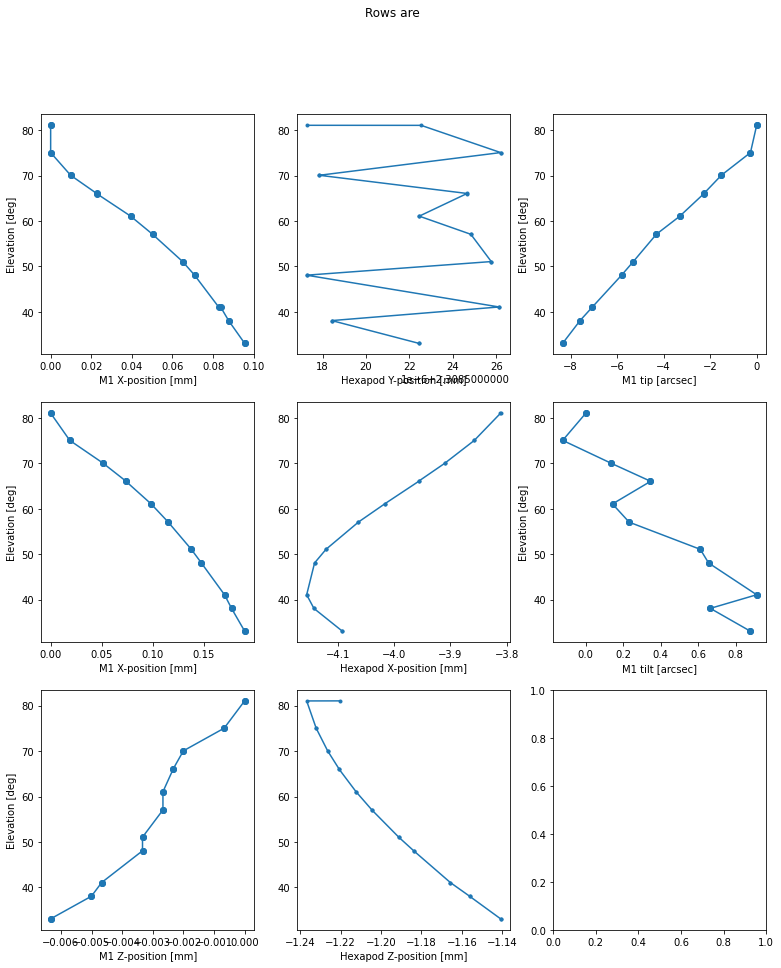

In [31]:
%matplotlib inline
nwide=3; nhigh=3
fig, (row1,row2,row3) = plt.subplots(nhigh, nwide, figsize=(nwide+fig_width, nhigh*fig_height))
fig.suptitle('Rows are')
xvals = (df4.m1_x_pos) # um
yvals = df4.el

row1[0].plot(xvals, yvals, 'o-')
row1[0].set_ylabel('Elevation [deg]')
row1[0].set_xlabel('M1 X-position [mm]')

xvals=df4.y
row1[1].plot(xvals,yvals, '.-')
row1[1].set_xlabel('Hexapod Y-position [mm]')


xvals = (df4.m1_tip) # um
row1[2].plot(xvals, yvals, 'o-')
row1[2].set_ylabel('Elevation [deg]')
row1[2].set_xlabel('M1 tip [arcsec]')


xvals = (df4.m1_y_pos) # mm
row2[0].plot(xvals, yvals, 'o-')
row2[0].set_ylabel('Elevation [deg]')
row2[0].set_xlabel('M1 X-position [mm]')

xvals=df4.x
row2[1].plot(xvals,yvals, '.-')
row2[1].set_xlabel('Hexapod X-position [mm]')

xvals = (df4.m1_tilt) # um
row2[2].plot(xvals, yvals, 'o-')
row2[2].set_ylabel('Elevation [deg]')
row2[2].set_xlabel('M1 tilt [arcsec]')

xvals = (df4.m1_piston) # mm
row3[0].plot(xvals, yvals, 'o-')
row3[0].set_ylabel('Elevation [deg]')
row3[0].set_xlabel('M1 Z-position [mm]')

xvals=df4.z
row3[1].plot(xvals,yvals, '.-')
row3[1].set_xlabel('Hexapod Z-position [mm]')


# Calculate Stellar Movement and PSF info

In [32]:
from lsst.pipe.tasks.characterizeImage import CharacterizeImageTask
from lsst.meas.algorithms.installGaussianPsf import InstallGaussianPsfConfig
from lsst.pex.exceptions import InvalidParameterError
def measurePsf(exp):
    PLATESCALE = 0.095695

    imCharConfig = CharacterizeImageTask.ConfigClass()
    imCharConfig.doMeasurePsf = True
    imCharConfig.useSimplePsf = True
    
    imCharConfig.doApCorr = False
    imCharConfig.doDeblend = False
    
    installConfig = InstallGaussianPsfConfig()
    exp.setPsf(None)  # if not set to none, fwhm max para is ignored
    installConfig.fwhm = 25
    installConfig.width = 61
    
    imCharConfig.installSimplePsf = installConfig    
    
    imCharConfig.detection.includeThresholdMultiplier = 5

    imCharConfig.measurePsf.starSelector['objectSize'].doFluxLimit = True
    imCharConfig.measurePsf.starSelector['objectSize'].fluxMin = 12500.0
    imCharConfig.measurePsf.starSelector['objectSize'].fluxMax = 0.0
    imCharConfig.measurePsf.starSelector['objectSize'].doSignalToNoiseLimit = False
    imCharConfig.measurePsf.starSelector['objectSize'].signalToNoiseMin = 20.0
    imCharConfig.measurePsf.starSelector['objectSize'].signalToNoiseMax = 0.0
    imCharConfig.measurePsf.starSelector['objectSize'].widthMin = 0.0
    imCharConfig.measurePsf.starSelector['objectSize'].widthMax = 80.0  # default 10
    imCharConfig.measurePsf.starSelector['objectSize'].sourceFluxField = "base_GaussianFlux_instFlux"
    imCharConfig.measurePsf.starSelector['objectSize'].widthStdAllowed = 0.15 # 0.15 default
    imCharConfig.measurePsf.starSelector['objectSize'].nSigmaClip = 2.0
    
    
    imCharConfig.background.binSize = 2000
    imCharConfig.background.approxOrderX = 2
    imCharConfig.measurePsf.psfDeterminer['psfex'].spatialOrder = 1

    imCharConfig.detection.background = imCharConfig.background
    
    imCharTask = CharacterizeImageTask(config=imCharConfig)

    result = imCharTask.run(exp)

    psf = exp.getPsf()
    ixx = psf.computeShape(exp.getBBox().getCenter()).getIxx()
    iyy = psf.computeShape(exp.getBBox().getCenter()).getIyy()
    psfShape = psf.computeShape(exp.getBBox().getCenter()).getDeterminantRadius()
    
    fwhmX = np.sqrt(ixx)*2.355*PLATESCALE
    fwhmY = np.sqrt(iyy)*2.355*PLATESCALE
    
    overallFwhm = psfShape * 2.355 * PLATESCALE
    print(f"Psf shape from imChar task (x,y) = ({fwhmX:.3f}, {fwhmY:.3f}) FWHM arcsec")
    return fwhmX, fwhmY, overallFwhm, psf

In [33]:
from lsst.pipe.tasks.quickFrameMeasurement import QuickFrameMeasurementTask
from lsst.ts.observing.utilities.auxtel.latiss.utils import parse_obs_id,calculate_xy_offsets
from lsst.ts.observing.utilities.auxtel.latiss.getters import get_image
from astropy import units as u
from lsst.geom import PointD
qm_config = QuickFrameMeasurementTask.ConfigClass()
qm = QuickFrameMeasurementTask(config=qm_config)

In [34]:
brightest_source_centroid = []
fwhmX_arr=[]; fwhmY_arr=[]; overallFwhm_arr=[]

for image_name in df5.inFocus20s:
    print(f'Processing image {image_name}')
    if image_name is None:
        continue
    _, _, day_obs, seq_num = image_name.split("_")
    day_obs = int(f"{day_obs[0:4]}{day_obs[4:6]}{day_obs[6:8]}")
    exp = await get_image(
            dict(day_obs=day_obs, seq_num=int(seq_num), detector=0),
            datapath="/readonly/repo/main/",
            timeout=10,
            runBestEffortIsr=True,
        )
    result = qm.run(exp)
    brightest_source_centroid.append(result)
    try:
        fwhmX, fwhmY, overallFwhm, psf = measurePsf(exp)
        fwhmX_arr.append(fwhmX)
        fwhmY_arr.append(fwhmY)
        overallFwhm_arr.append(overallFwhm)
    except InvalidParameterError as e:
        print('Caught the InvalidParameterError, marking values as NaNs')
        print(f'error is {e}')
        fwhmX_arr.append(np.nan)
        fwhmY_arr.append(np.nan)
        overallFwhm_arr.append(np.nan) 

Processing image AT_O_20210909_000510


RuntimeError: DataId specification for dimension exposure matched no records when constrained by {'day_obs': 20210909, 'seq_num': 510}

In [ ]:
df5.keys()

In [ ]:
# Calculate alt/az motions in the image

In [ ]:
def rotation_matrix(angle):
    """Rotation matrix.
    """
    return np.array(
        [
            [np.cos(np.radians(angle)), -np.sin(np.radians(angle)), 0.0],
            [np.sin(np.radians(angle)), np.cos(np.radians(angle)), 0.0],
            [0.0, 0.0, 1.0],
        ])

In [ ]:
angle_arr = np.array(df4.el) - np.array(df4.az) + 90.0 # degrees

#azel_correction = np.zeros((2, len(calc_data.xcentroid)))
azel_correction = np.zeros((2, len(brightest_source_centroid)))
im_centroid = np.zeros((2, len(brightest_source_centroid)))
reference = PointD(brightest_source_centroid[0].brightestObjCentroid)
medianXxYy = np.zeros((2, len(brightest_source_centroid)))

for i, source_xy in enumerate(brightest_source_centroid):
    dx_arcsec, dy_arcsec = calculate_xy_offsets(
        PointD(
            source_xy.brightestObjCentroid[0],
            source_xy.brightestObjCentroid[1]
        ), 
        reference)

    # We are using rotator 2 so we must apply a negative sign on the x-axis offset.
    # The equation bellow return offset in elevation/azimuth.
    elaz_offset = np.matmul((-dx_arcsec, dy_arcsec, 0.), rotation_matrix(angle_arr[i]))*u.arcsec
    azel_correction[:,i] = np.array((elaz_offset[0].value, elaz_offset[1].value))
    im_centroid[:,i] = np.array((source_xy.brightestObjCentroid[0], source_xy.brightestObjCentroid[1]))
    medianXxYy[:,i] = np.array((source_xy.medianXxYy[0], source_xy.medianXxYy[1]))
    
    print(elaz_offset)

In [ ]:
df5['xcentroid']=im_centroid[0,:]
df5['ycentroid']=im_centroid[1,:]

df5['azShift']=azel_correction[0,:]
df5['elShift']=azel_correction[1,:]

df5['medianXx']=medianXxYy[0,:]
df5['medianYy']=medianXxYy[1,:]

df5['medianXx']=medianXxYy[0,:]
df5['medianYy']=medianXxYy[1,:]

df5['psf_fwhmx']=fwhmX_arr
df5['psf_fwhmy']=fwhmY_arr
df5['psf_fwhm_overall']=overallFwhm_arr

In [ ]:
df5

In [ ]:
#write to CSV file
filename="data/"+date+'_'+test+"_"+run+"_data_with_WFE_m1Pos_centroids.csv"

In [ ]:
df5.to_csv(filename)

## Plot the data

In [ ]:
# Read in the file (written using code above)
filename="data/"+date+'_'+test+"_"+run+"_metadata.csv"
df5 = pd.read_csv(filename, index_col=0)
df5.index=pd.to_datetime(df5.index)

In [ ]:
df5

In [ ]:
%matplotlib inline
nwide=3; nhigh=3
fig_height=5
fig_width=15
fig, (row1,row2,row3) = plt.subplots(nhigh, nwide, figsize=(nwide+fig_width, nhigh*fig_height))
fig.suptitle('Rows are')
df_plot=df5
xvals = (df_plot.m1_x_pos) # um
yvals = df_plot.el

row1[0].plot(xvals, yvals, 'o-')
row1[0].set_ylabel('Elevation [deg]')
row1[0].set_xlabel('M1 X-position [mm]')

xvals=df_plot.y
row1[1].plot(xvals,yvals, '.-')
row1[1].set_xlabel('Hexapod Y-position [mm]')

xvals = (df_plot.m1_tip) # um   - Tip should mean ~azimuth motion
row1[2].plot(xvals, yvals, 'o-')
row1[2].set_xlabel('M1 tip [arcsec]')

xvals = (df_plot.m1_y_pos) # mm
row2[0].plot(xvals, yvals, 'o-')
row2[0].set_ylabel('Elevation [deg]')
row2[0].set_xlabel('M1 X-position [mm]')

xvals=df_plot.x
row2[1].plot(xvals,yvals, '.-')
row2[1].set_xlabel('Hexapod X-position [mm]')

xvals = (df_plot.m1_tilt) # um
row2[2].plot(xvals, yvals, 'o-')
row2[2].set_xlabel('M1 tilt [arcsec]')

xvals = (df_plot.m1_piston) # mm
row3[0].plot(xvals, yvals, 'o-')
row3[0].set_ylabel('Elevation [deg]')
row3[0].set_xlabel('M1 Z-position [mm]')

xvals=df_plot.z
row3[1].plot(xvals,yvals, '.-')
row3[1].set_xlabel('Hexapod Z-position [mm]')

In [ ]:
%matplotlib inline
nwide=3; nhigh=1
fig, (row1) = plt.subplots(nhigh, nwide, figsize=(nwide+fig_width, nhigh*fig_height))
fig.suptitle('Rows are')
df_plot=df6
yvals = df_plot.el

xvals = df_plot.medianXx # um
row1[0].plot(xvals, yvals, 'o-')
row1[0].set_ylabel('Elevation [deg]')
row1[0].set_xlabel('X-FWHM [arcsec]')

xvals=df_plot.medianYy
row1[1].plot(xvals,yvals, '.-')
row1[1].set_xlabel('Y-FWHM [arcsec]')

xvals=(df_plot.medianYy+df_plot.medianXx)/2
row1[2].plot(xvals,yvals, '.-')
row1[2].set_xlabel('FWHM [arcsec]')

xvals = df_plot.psf_fwhmx # um
row1[0].plot(xvals, yvals, 'o-')
row1[0].set_ylabel('Elevation [deg]')
row1[0].set_xlabel('X-FWHM [arcsec]')

xvals=df_plot.psf_fwhmy
row1[1].plot(xvals,yvals, '.-')
row1[1].set_xlabel('Y-FWHM [arcsec]')

xvals=df_plot.psf_fwhm_overall
row1[2].plot(xvals,yvals, '.-')
row1[2].set_xlabel('FWHM [arcsec]')

xvals=df_plot.seeing
row1[2].plot(xvals,yvals, '.-')
row1[2].set_xlabel('FWHM [arcsec]')

In [ ]:
runs = ['initial','iter2']
sym= ['.-','x-','s-']
color=['red','blue','green']
df={}

fig_height=5
fig_width=15

%matplotlib inline
from matplotlib import colors

nwide=3; nhigh=2
fig, (row1,row2) = plt.subplots(nhigh, nwide, figsize=(nwide+fig_width, nhigh*fig_height))
fig.suptitle('Row1 is QM data, Row2 is from psfEx')

for i,r in enumerate(runs):
    filename="data/"+date+'_'+test+"_"+r+"_data_with_WFE_m1Pos_centroids_dimm.csv"
    df[r] = pd.read_csv(filename, index_col=0)
    print(filename)
    df[r].index=pd.to_datetime(df[r].index)
    yvals = df[r].el

    xvals = df[r].medianXx # um
    row1[0].plot(xvals, yvals, 'o-')
    row1[0].set_ylabel('Elevation [deg]')
    row1[0].set_xlabel('X-FWHM [arcsec]')

    xvals=df[r].medianYy
    row1[1].plot(xvals,yvals, '.-')
    row1[1].set_xlabel('Y-FWHM [arcsec]')

    xvals=(df[r].medianYy+df[r].medianXx)/2.0
    row1[2].plot(xvals,yvals, '.-',color=color[i])
    row1[2].set_xlabel('FWHM [arcsec]')
    
    xvals=df[r].seeing
    row1[2].plot(xvals,yvals, '.--', color=color[i], label='seeing')
    row1[2].set_xlabel('FWHM [arcsec]')
    row1[2].legend()

    xvals = df[r].psf_fwhmx # um
    row2[0].plot(xvals, yvals, 'o-')
    row2[0].set_ylabel('Elevation [deg]')
    row2[0].set_xlabel('X-FWHM [arcsec]')

    xvals=df[r].psf_fwhmy
    row2[1].plot(xvals,yvals, '.-')
    row2[1].set_xlabel('Y-FWHM [arcsec]')

    xvals=df[r].psf_fwhm_overall
    row2[2].plot(xvals,yvals, '.-',color=color[i])
    row2[2].set_xlabel('FWHM [arcsec]')
    
    xvals=df[r].seeing
    row2[2].plot(xvals,yvals, '.--', color=color[i], label='seeing')
    row2[2].set_xlim(0.7,2.4)
    row2[2].set_xlabel('FWHM [arcsec]')
    row2[2].set_ylabel('Elevation [deg]')
    row2[2].legend()

In [ ]:
runs = ['initial','iter2']
sym= ['.-','x-','s-']
color=['red','blue','green']
df={}

fig_height=10
fig_width=10

%matplotlib inline
from matplotlib import colors

nwide=1; nhigh=1
fig,row1 = plt.subplots(nhigh, nwide, figsize=(nwide+fig_width, nhigh*fig_height))
fig.suptitle('Data is from psfEx')

for i,r in enumerate(runs):
    filename="data/"+date+'_'+test+"_"+r+"_data_with_WFE_m1Pos_centroids_dimm.csv"
    df[r] = pd.read_csv(filename, index_col=0)
    print(filename)
    df[r].index=pd.to_datetime(df[r].index)
    yvals = df[r].el

    xvals=df[r].psf_fwhm_overall-df[r].seeing
    row1.plot(xvals,yvals, '.--', color=color[i], label=f'{r} sequence')
#     row2[2].set_xlim(0.7,2.4)
    row1.set_xlabel('(Measured FWHM - Seeing) [arcsec]')
    row1.set_ylabel('Elevation [deg]')
    row1.legend()

In [ ]:
import lsst.daf.butler as dafButler
butler = dafButler.Butler('/readonly/repo/main', instrument='LATISS', collections='LATISS/raw/all')
dataId = {'day_obs': 20210907, 'seq_num': 375, 'detector': 0} 
dataId = {'day_obs': 20210909, 'seq_num': 375, 'detector': 0} 
raw = butler.get('raw', dataId=dataId)